In [1]:
'''Combine the figure and make the result'''
#Date: 2020/07/01
#@Creator: Castrolin
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
image1 = cv2.imread('6112out.jpg')
image2 = cv2.imread('6114out.jpg')
image3 = cv2.imread('6115out.jpg')
image4 = cv2.imread('6116out.jpg')
image5 = cv2.imread('6117out.jpg')
image6 = cv2.imread('6118out.jpg')
image_base = cv2.imread(r'image_spatter_area/6120.PNG')

In [2]:
imgCut6112 = image1[1500:2000,:,:]
imgCut6114 = image2[600:1300,:,:]
imgCut6115 = image3[600:1300,:,:]
imgCut6116 = image4[2000:2600,:,:]
imgCut6117 = image5[2000:2600,:,:]
imgCut6118 = image6[1800:2600,:,:]

In [3]:
image_copy = image_base.copy()
'''image_copy[310:810,:,:] = imgCut6112
image_copy[810:1310,1200:5200,:] = imgCut6114[200:imgCut6114.shape[1],0:4000,:]
image_copy[1010:1610,1400:5400,:] = imgCut6115[100:imgCut6114.shape[1],0:4000,:]
image_copy[1610:2110,1600:5600,:] = imgCut6117[100:imgCut6114.shape[1],0:4000,:]
#image_copy[1610:2110,:,:] = imgCut6117[100:imgCut6114.shape[1],:,:]
cv2.imshow('image',image_copy)
cv2.waitKey(0)'''

"image_copy[310:810,:,:] = imgCut6112\nimage_copy[810:1310,1200:5200,:] = imgCut6114[200:imgCut6114.shape[1],0:4000,:]\nimage_copy[1010:1610,1400:5400,:] = imgCut6115[100:imgCut6114.shape[1],0:4000,:]\nimage_copy[1610:2110,1600:5600,:] = imgCut6117[100:imgCut6114.shape[1],0:4000,:]\n#image_copy[1610:2110,:,:] = imgCut6117[100:imgCut6114.shape[1],:,:]\ncv2.imshow('image',image_copy)\ncv2.waitKey(0)"

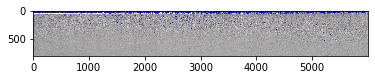

13

In [4]:
plt.imshow(imgCut6118)
plt.show()
cv2.imshow('imgcut6118',imgCut6118)
cv2.waitKey(0)

In [5]:
#color detection
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
imgCut6112 = cv2.cvtColor(imgCut6112,cv2.COLOR_BGR2HSV)
imgCut6115 = cv2.cvtColor(imgCut6115,cv2.COLOR_BGR2HSV)
imgCut6118 = cv2.cvtColor(imgCut6118,cv2.COLOR_BGR2HSV)

mask1 = cv2.inRange(imgCut6112, lower_red, upper_red)
mask2 = cv2.inRange(imgCut6115, lower_red, upper_red)
mask3 = cv2.inRange(imgCut6118, lower_red, upper_red)

out = cv2.bitwise_and(imgCut6112,imgCut6112,mask = mask1)
out_1 = cv2.bitwise_and(imgCut6115,imgCut6115,mask = mask2)
out_2 = cv2.bitwise_and(imgCut6118,imgCut6118,mask = mask3)
#R channel make it 
out[:,:,0]=0
out[:,:,1]=0
out_1[:,:,0]=0
out_1[:,:,1]=0
out_2[:,:,0]=0
out_2[:,:,1]=0

out[0:110,:,2]=0
out_1[0:110,:,2]=0

cv2.imshow('i1',out)
cv2.imshow('i2',out_1)
cv2.imshow('i3',out_2)
cv2.waitKey(0)

13

In [ ]:
tt = out.copy()
tt = np.double(tt)
for i in np.arange(0,out.shape[0]):
    L = np.mean(out[i,:,2])
    #print(i,'\t\t',L)
    plt.plot(i,L,'r*')
plt.show()

for i in np.arange(0,out.shape[0]):
    n=0
    for j in np.arange(0,out.shape[1]):
        if out[i,j,2] != 0:
            n=n+1
    plt.plot(i,n,'r*')
plt.show()

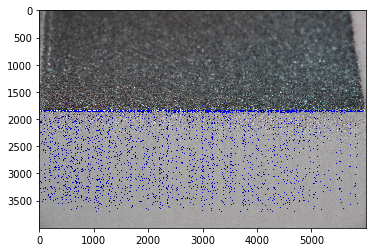

In [26]:
image_try = cv2.imread(r'image_spatter_area/6118.PNG')
n= 0
for i in np.arange(1840,2340):
    for j in np.arange(0,image_try.shape[1]):
        if out_2[n,j,2]!= 0:
            image_try[i,j,:]=out_2[n,j,:]
    n=n+1
for k in np.arange(1600,3300,100):
    n=0
    for i in np.arange(k,k+500):
        for j in np.arange(0,image_try.shape[1]):
            if out_1[n,j,2]!=0:
                image_try[i,j,:]=out_1[n,j,:]
        n=n+1

    
#cv2.imshow('image',image_try)
#cv2.waitKey(0)

plt.imshow(image_try)
plt.show()


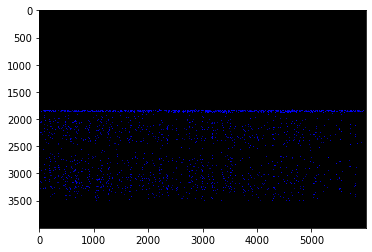

In [10]:
image_tt = image_try.copy()
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
image_tt = cv2.cvtColor(image_tt,cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(image_tt, lower_red, upper_red)
result_out = cv2.bitwise_and(image_tt,image_tt,mask = mask1)
result_out[:,:,0]=0
result_out[:,:,1]=0
plt.imshow(result_out)
plt.show()

In [23]:
from numpy.random import seed
from numpy.random import randint
seed(1)
ran=randint(0,3000,3000)
    

In [24]:
print(ran)

[1061  235 1096 ... 2964 1207  472]


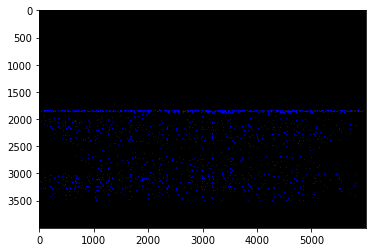

In [12]:
result_copy = result_out.copy()
for u in np.arange(2000,3000):
    uu = (u-2000)%2000
    result_copy[u,0:uu,2]=0
    result_copy[u,result_copy.shape[1]-(uu):result_copy.shape[1],2]=0
    #for v in np.arange(0,result_copy.shape[1]):
        #reusul_copy[u,]
plt.imshow(result_copy)
plt.show()            

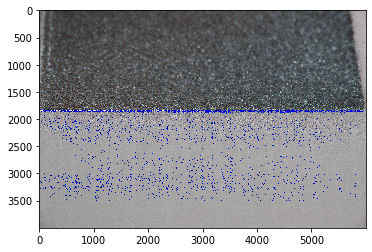

In [13]:
image_final = cv2.imread(r'image_spatter_area/6118.PNG')
n= 0
for i in np.arange(0,image_final.shape[0]):
    for j in np.arange(0,image_final.shape[1]):
        if result_copy[n,j,2]!= 0:
            image_final[i,j,:]=result_copy[n,j,:]
    n=n+1
plt.imshow(image_final)
plt.show()        

[135706, 59119, 125267, 77286]


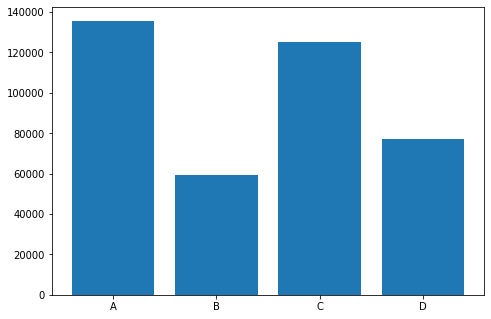

In [18]:
rr = []
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
region=['A','B','C','D']
s=0
for u in np.arange(2000,3601):
    n=0
    for v in np.arange(0,result_out.shape[1]):
        if result_out[u,v,2] != 0:
            n=n+1
    uu = u%400
    if uu != 0  :
        s = s+n
    elif u!=2000 and uu==0:
        rr.append(s)
        s=0   
print(rr)
ax.bar(region,rr)
plt.show()

In [20]:
cv2.imwrite('try_try.jpg',image_try)

True

In [11]:
cv2.imshow('image',image_try)
cv2.waitKey(0)


13

In [35]:
cv2.imwrite('try_2.jpg',image_final)

True

In [ ]:
#cv2.imwrite('mask1.jpg',out)
#cv2.imwrite('mask2.jpg',out_1)
#cv2.imwrite('mask3.jpg',out_2)

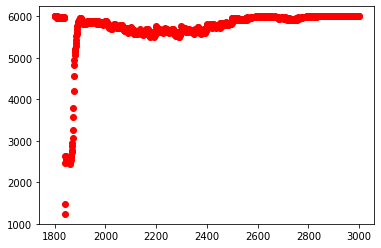

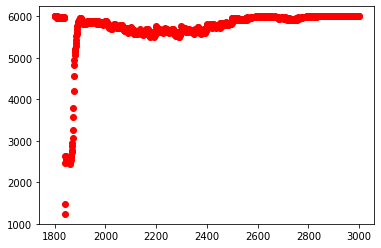

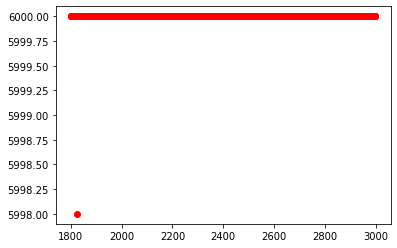

In [27]:
for u in np.arange(1800,3000):
    n=0
    for v in np.arange(0,image_try.shape[1]):
        if image_try[u,v,0] != 0:
            n = n+1
    plt.plot(u,n,'ro')
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([5500,7500])
plt.show()
for u in np.arange(1800,3000):
    n=0
    for v in np.arange(0,image_try.shape[1]):
        if image_try[u,v,1] != 0:
            n = n+1
    plt.plot(u,n,'ro')
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([5500,7500])
plt.show()
for u in np.arange(1800,3000):
    n=0
    for v in np.arange(0,image_try.shape[1]):
        if image_try[u,v,2] != 0:
            n = n+1
    plt.plot(u,n,'ro')
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([5500,7500])
plt.show()